<a href="https://colab.research.google.com/github/RodrigoPretes/MeuProjeto/blob/main/prova1_IA_rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geneticalgorithm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=9426e537677dda3daaff419a0e0d76bf80945e57c8249cc221baa259d83b505f
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [2]:
##Inicio Questao 5
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)
import keras
import pandas as pd
import numpy as np

2.14.0


2.13.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 1s 628ms/step - loss: 215.1466 - mae: 215.1466 - val_loss: 200.9969 - val_mae: 200.9969
Epoch 2/2000
1/1 [==============================] - 0s 60ms/step - loss: 214.8465 - mae: 214.8465 - val_loss: 200.7154 - val_mae: 200.7154
Epoch 3/2000
1/1 [==============================] - 0s 61ms/step - loss: 214.5464 - mae: 214.5464 - val_loss: 200.4340 - val_mae: 200.4340
Epoch 4/2000
1/1 [==============================] - 0s 62ms/step - loss: 214.2463 - mae: 214.2463 - val_loss: 200.1525 - val_

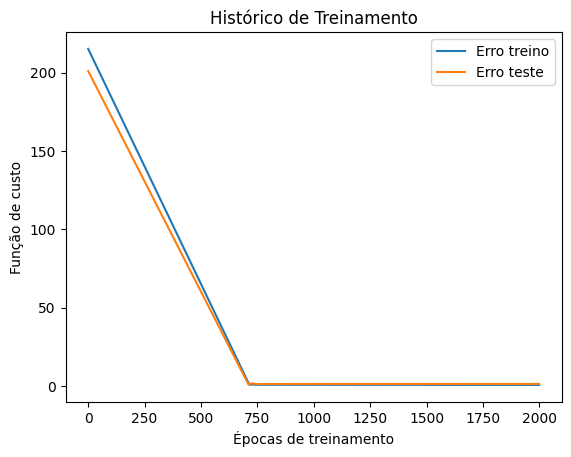

0B -> L1N0: -0.452793151140213
L0N0                   -> L1N0 = 0.01658284291625023
L0N1                   -> L1N0 = -0.856715202331543


In [ ]:

#Continuação questão 5
import tensorflow as tf
print(tf.__version__)

import keras
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')



# Entra com os dados
X_treino = np.array(
    [
        [370,7], [220,3], [180,4], [400,7], [380,8],
        [410,9], [220,2], [170,3]
    ]
)
Y_treino = np.array( [ #-1 laranja / # 1 limao
         [-1],[1],[1],[-1],[-1],
         [-1],[1],[1] ] )
X_teste = np.array(
    [
        [380,8], [170,3]
    ]
)
Y_teste = np.array( [[1],[-1]] )




# Monta a rede
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential() # Inicializa a Rede Neural Artificial

modelo.add(Dense(units = 1, input_dim = X_treino.shape[1]))



# Mostra a rede
modelo.summary()



# Treina a rede
modelo.compile(loss='mae', optimizer = 'adam', metrics=['mae'])


resultado = modelo.fit(X_treino, Y_treino, batch_size = 13, epochs = 2000, validation_data=(X_teste, Y_teste))



# Mostra o Teste
Y_predito = modelo.predict(X_teste)

Y_predito





# Teste da Rede
Y_predito = modelo.predict(X_teste) # Faz o arrendodamento
Y_predito = [ 1 if y>=0.0 else -1 for y in Y_predito ] #positivo +1 / negativo -1
print("Valores Preditos:",Y_predito)

total = 0
correto = 0
errado = 0
for i in Y_predito:
  total=total+1
  if(Y_teste[i,0] == Y_predito[i]):
    correto=correto+1
  else:
    errado=errado+1

print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))



# Mostra graficos
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()





# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')








2.13.0


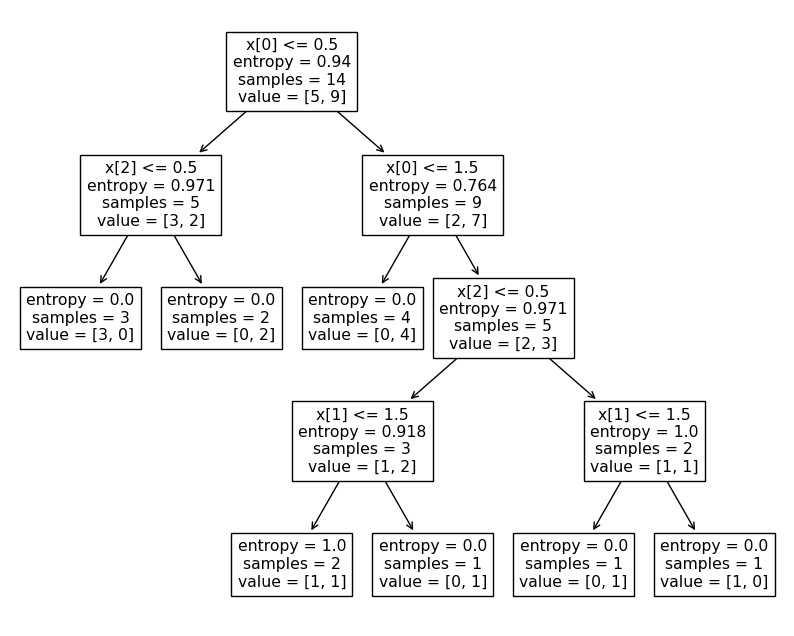

In [ ]:
## Questão 4

import tensorflow as tf
print (tf.__version__)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entrada de dados
X1 = np.array(
 [
 ['Sol', 'Quente', 'Elevada', 'Fraco'],
 ['Sol', 'Quente', 'Elevada', 'Forte'],
 ['Nuvens', 'Quente', 'Elevada', 'Fraco'],
 ['Chuva', 'Ameno', 'Elevada', 'Fraco'],
 ['Chuva', 'Fresco', 'Elevada', 'Fraco'],
 ['Chuva', 'Fresco', 'Normal', 'Forte'],
 ['Nuvens', 'Fresco', 'Normal', 'Fraco'],
 ['Sol', 'Ameno', 'Elevada', 'Fraco'],
 ['Sol', 'Fresco', 'Normal', 'Fraco'],
 ['Chuva', 'Ameno', 'Normal', 'Forte'],
 ['Sol', 'Ameno', 'Normal', 'Forte'],
 ['Nuvens', 'Ameno', 'Elevada', 'Forte'],
 ['Nuvens', 'Quente', 'Normal', 'Fraco'],
 ['Chuva', 'Ameno', 'Elevada', 'Forte']
 ]
)
Y = np.array( [ 'não', 'não', 'sim', 'sim', 'sim', 'não', 'sim' , 'não' , 'sim' , 'sim' , 'sim' , 'sim' , 'sim' , 'não'  ] )
X = X1
# Altera os dados para números
for i in range(len(X1)):
 if X1[i][0] == "Sol":
  X[i][0] = 0
 if X1[i][0] == "Nuvens":
  X[i][0] = 1
 if X1[i][0] == "Chuva":
  X[i][0] = 2
 if X1[i][1] == "Quente":
  X[i][1] = 0
 if X1[i][1] == "Ameno":
  X[i][1] = 1
 if X1[i][1] == "Fresco":
  X[i][1] = 2
 if X1[i][2] == "Elevada":
  X[i][2] = 0
 if X1[i][2] == "Normal":
  X[i][2] = 1
 if X1[i][3] == "Fraco":
  X[i][3] = 1
 if X1[i][3] == "Forte":
  X[i][3] = 1

XX = pd.DataFrame(X, dtype=str, columns=['Aspecto',
'Temp.', 'Humidade', 'Vento'])
YY = pd.DataFrame(Y, dtype=str, columns=['Jogar Ténis'])
XX
YY
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy')
# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_
arvore.classes_
arvore.score(XX, YY)
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()

array(['sim'], dtype=object)

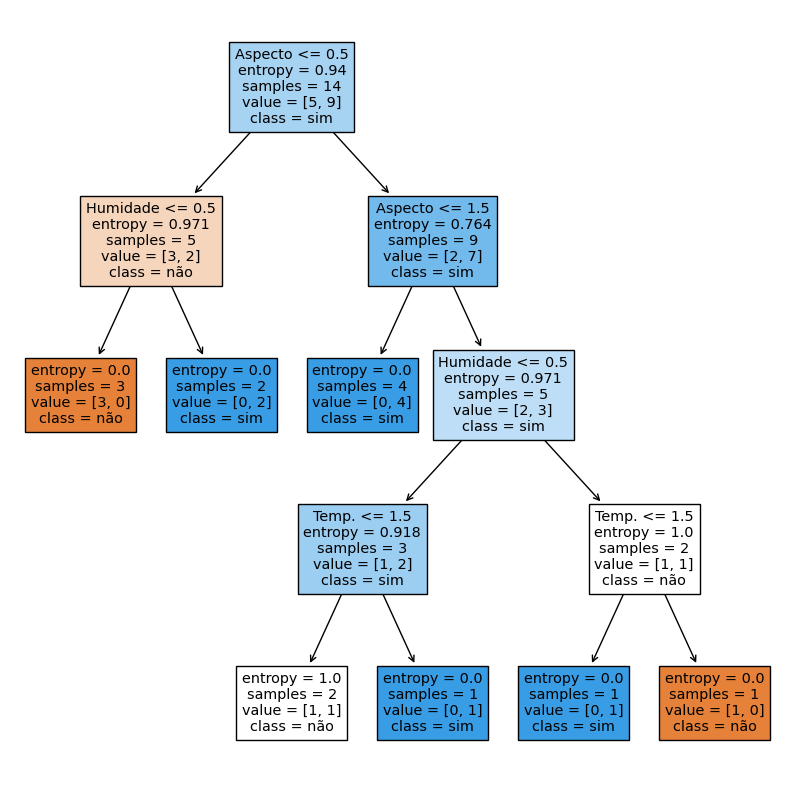

In [ ]:
# Visualizando essa árvore 2
previsores = ['Aspecto',  'Temp.', 'Humidade', 'Vento']
figura, eixos = plt.subplots(nrows=1, ncols=1,
figsize=(10,10))
tree.plot_tree(arvore, feature_names=previsores,
class_names = arvore.classes_, filled=True)
# Fazendo a previsão
X2 = pd.DataFrame([['0','0','1','0']], columns=['Aspecto',
'Temp.', 'Humidade', 'Vento'])
X2
previsoes2 = arvore.predict(X2)
previsoes2

In [ ]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns
r = export_text(arvore, feature_names=XX.columns.tolist())


print(r)

|--- Aspecto <= 0.50
|   |--- Humidade <= 0.50
|   |   |--- class: não
|   |--- Humidade >  0.50
|   |   |--- class: sim
|--- Aspecto >  0.50
|   |--- Aspecto <= 1.50
|   |   |--- class: sim
|   |--- Aspecto >  1.50
|   |   |--- Humidade <= 0.50
|   |   |   |--- Temp. <= 1.50
|   |   |   |   |--- class: não
|   |   |   |--- Temp. >  1.50
|   |   |   |   |--- class: sim
|   |   |--- Humidade >  0.50
|   |   |   |--- Temp. <= 1.50
|   |   |   |   |--- class: sim
|   |   |   |--- Temp. >  1.50
|   |   |   |   |--- class: não



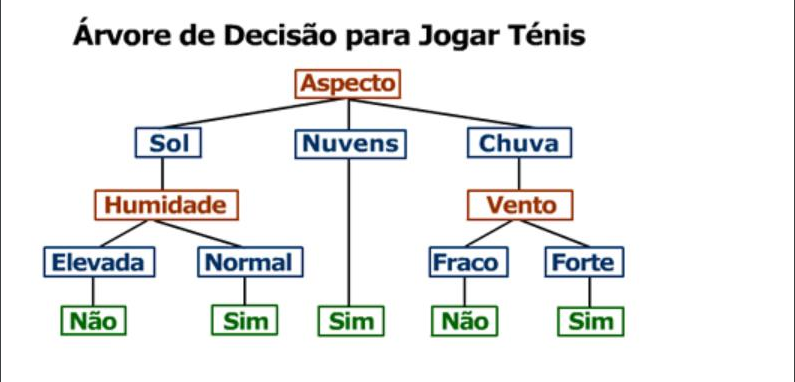

# **Questão 2 -**

A busca euristica pega um valor anteriormente definido para determinar a tomada de decisões, no caso abaixo utiliziei a distancia em linha reta entre as capitais. O algoritmo a* utiliza essa euristica e tem a possibilidade de retornar

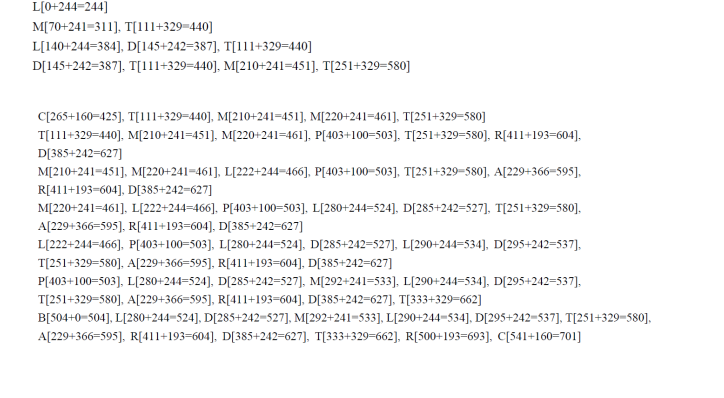

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=99b97fe16ebbd55436482f0c27226049659568491a5c237d801668abc892f2ce
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 The best solution found:
 [ 0. 11. 14. 17. 16. 13. 15. 12.  7.  2.  6.  5.  4.  3.  8.  9. 10.  1.]

 Objective function:
 3330.0


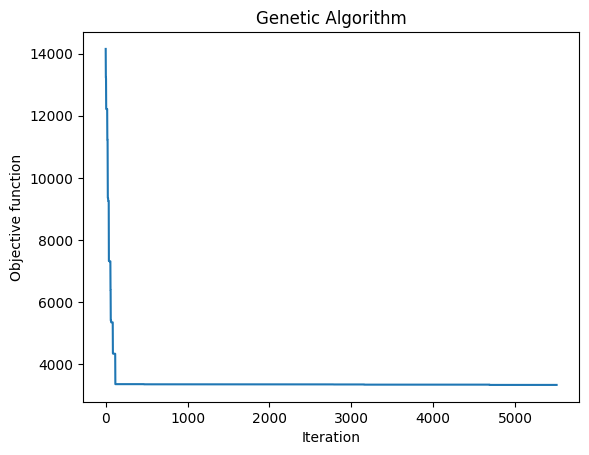

Letra C
A
A
L
O
R
Q
N
P
M
H
C
G
F
E
D
I
J
K
B
A


In [4]:
##Questão 6

import numpy as np
import math
from geneticalgorithm import geneticalgorithm as ga

b = np.array([[0, 20, 999, 999, 999, 999, 999, 29, 999, 999, 999, 29, 37, 999, 999, 999, 999, 999],
              [20, 0, 25, 999, 999, 999, 999, 28, 999, 999, 999, 39, 999, 999, 999, 999, 999, 999],
              [999, 25, 0, 25, 999, 999, 999, 30, 999, 999, 999, 999, 54, 999, 999, 999, 999, 999],
              [999, 999, 25, 0, 39, 32, 42, 999, 23, 33, 999, 999, 999, 999, 56, 999, 999, 999],
              [999, 999, 999, 39, 0, 12, 26, 999, 999, 19, 999, 999, 999, 999, 999, 999, 999, 999],
              [999, 999, 999, 32, 12, 0, 17, 999, 999, 35, 30, 999, 999, 999, 999, 999, 999, 999],
              [999, 999, 999, 42, 26, 17, 0, 999, 999, 999, 38, 999, 99, 999, 999, 999, 999, 999],
              [29, 28, 30, 999, 999, 999, 999, 0, 999, 999, 999, 25, 22, 999, 999, 999, 999, 999],
              [999, 999, 999, 23, 999, 999, 999, 999, 0, 26, 999, 999, 999, 999, 999, 999, 999, 999],
              [999, 999, 999, 33, 19, 35, 999, 999, 26, 0, 24, 999, 999, 30, 19, 999, 999, 999],
              [999, 999, 999, 999, 999, 30, 38, 999, 999, 24, 0, 999, 999, 999, 26, 999, 999, 36],
              [29, 39, 999, 999, 999, 999, 999, 25, 999, 999, 999, 0, 27, 999, 999, 43, 999, 999],
              [37, 999, 54, 999, 999, 999, 999, 22, 34, 999, 999, 27, 0, 24, 999, 19, 999, 999],
              [999, 999, 999, 56, 999, 999, 999, 999, 999, 30, 999, 999, 24, 0, 20, 19, 17, 999],
              [999, 999, 999, 999, 999, 999, 999, 999, 999, 19, 26, 999, 999, 20, 0, 999, 18, 21],
              [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 43, 19, 19, 999, 0, 26, 999],
              [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 26, 17, 18, 999, 0, 15],
              [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 36, 999, 999, 999, 21, 999, 15, 0]
              ])
inicio=0
fim=0

def f(X):
    dim=len(X)
    OF=0
    OF+=b[inicio][math.trunc(X[0])]
    for i in range(1,dim):
      OF+=b[math.trunc(X[i-1])][math.trunc(X[i])]

    for i in range(0,dim-1):
     for j in range(i+1,dim):
       if math.trunc(X[i])==math.trunc(X[j]):
         OF+=999

    OF+=b[math.trunc(X[dim-1])][fim]
    return OF

varbound=np.array([[0,len(b)-1]]*len(b))

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model = ga(function=f, dimension=len(b), variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()


cidade = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R"])
print("Letra C")
print(cidade[inicio])
for i in model.best_variable:
    print(cidade[math.trunc(i)])

print(cidade[fim])

1)
A)

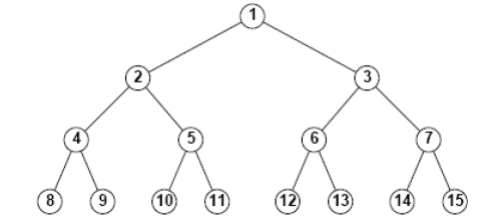

1)


b)


Busca em largura: 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11


Busca em profundidade limitada: 1 - 2 - 4 - 8 - 9 - 5 - 10 - 11


Aprofundamento iterativo: 1; 1 2 3; 1 2 4 5 3 6 7; 1 2 4 8 9 5 10 11

1)

c)

A busca bidirecional percorre os nós partindo de duas origens diferentes, estado inicial e estado de objeto. Assim, pode se usar a Busca BFS nas duas direções, expandindos os nós que estão ao lado do atual e validando se os caminhos deles se encontram.

1)


d)

Começamos nossa busca a partir do nó 1 e do nó 11 em direções opostas. Enquanto expandimos o nó 1, exploramos seus nós adjacentes e encontramos os nós 2 e 3.

No entanto, na outra direção, expandimos o nó 11 e encontramos apenas o nó 5 em sua vizinhança. Não encontramos nenhum nó em comum entre as duas buscas até este ponto.

Continuando, expandimos o nó 2 na busca a partir do nó 1 e o nó 5 na busca a partir do nó 11. Isso nos leva aos nós 4 e 5 na busca a partir do nó 1.

Aqui está o ponto crucial: ao expandir o nó 2, encontramos o nó 5, que é comum às duas buscas. Isso significa que atingimos nosso objetivo.

Portanto, a ordem de visitação sequencial dos nós foi: 1 → 11 → 2 → 3 → 5 → 4 → 5.

A busca iniciada a partir do estado inicial atingiu a profundidade 3, enquanto a busca iniciada na ordem inversa (do nó 11) atingiu a profundidade 2. O fator de ramificação da primeira busca foi 2, enquanto o da segunda busca foi 1.

3) Anote as representações logicas para as seguintes sentenças, adequando para uso com Modus Ponens generalizado:


a)Cavalos, vacas e porcos são mamiferos.


b)A prole de um cavalo é um cavalo


c)Barba azul é um cavalo.


d)Barba Azul é o pai ou mãe ou mãe de Charlie.


e)Prole e pai ou mãe são relações inversas.


f)Todo mamifero tem um pai ou mãe

Resposta 3:


a) \(M(x)\) - "x é um mamífero."

b) \(P(x, y)\) - "x é a prole de y."

c) \(H(x)\) - "x é um cavalo."

d) \(C(x)\) - "x é Barba Azul."

e) \(R(x, y)\) - "x é pai ou mãe de y."

f) \(\forall x(M(x) \rightarrow \exists y(R(y, x)))\) - "Para todo x, se x é um mamífero, então x tem um pai ou mãe."


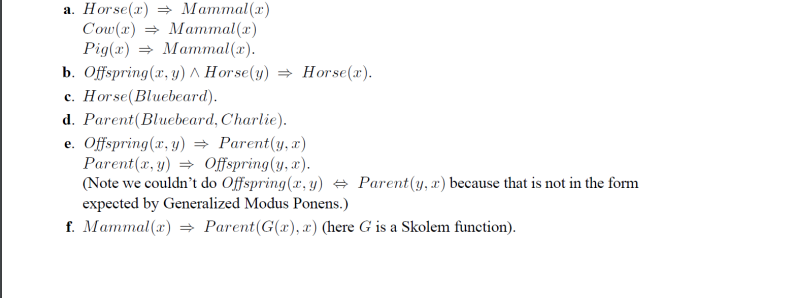
